Balance data

In [ ]:
import pandas as pd #pandas for displaying data

# Read descriptor csv files
#mordered = pd.read_csv('/Manuscrip_preparation/mordred_descriptors.csv')
Morgan_fingerprints = pd.read_csv('/Manuscrip_preparation/Morgan_fingerprints.csv')
#rdkit = pd.read_csv('/Manuscrip_preparation/rdkit_descriptors.csv')

df_2 = pd.read_csv('/Manuscrip_preparation/compounds/GLP1R_data2.csv', index_col=0)
df_2

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME
0,44290899.0,CC[C@H](C)[C@@H](C(=O)N[C@@H](C)C(=O)N[C@@H](C...,Active
1,122189729.0,CC[C@H](C)[C@@H](C(=O)N[C@@H](C)C(=O)N[C@@H](C...,Active
2,122189730.0,CCCCCCCCCCCCCCCCCC(=O)N[C@H](CCC(=O)NCCCC[C@@H...,Active
3,122189731.0,CCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CCC(=O)NCCOCCO...,Active
4,122189732.0,CC[C@H](C)[C@@H](C(=O)N[C@@H](C)C(=O)N[C@@H](C...,Active
...,...,...,...
862,604525.0,CC1=C(C(=NN1CC(=O)NN)C)Br,Inactive
863,2961794.0,CC(C(=O)NC(CC1=CC=C(C=C1)O)C(=O)OC)OC2=CC=CC=C2,Inactive
864,752521.0,CC1(N=C(NC(=N1)NC2=CC(=CC=C2)Br)N)C,Inactive
865,12006165.0,CCSC1=NN=C(C(=O)N1COC(=O)C2=CC=C(C=C2)S(=O)(=O...,Inactive


In [ ]:
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#mordred['PUBCHEM_ACTIVITY_OUTCOME'] = df_2['PUBCHEM_ACTIVITY_OUTCOME']
Morgan_fingerprints['PUBCHEM_ACTIVITY_OUTCOME'] = df_2['PUBCHEM_ACTIVITY_OUTCOME']
#rdkit['PUBCHEM_ACTIVITY_OUTCOME'] = df_2['PUBCHEM_ACTIVITY_OUTCOME']
Morgan_fingerprints.insert(0, 'CID', df_2['PUBCHEM_CID'])
compound_names = Morgan_fingerprints['CID']

In [ ]:
#remove rows with NAN values and rest index after drop
morgan = Morgan_fingerprints.dropna(axis=0)
morgan = Morgan_fingerprints.dropna().reset_index(drop=True)

morgan.shape

(867, 2050)

In [ ]:
#display various classes of the PUBCHEM_ACTIVITY_OUTCOME
morgan['PUBCHEM_ACTIVITY_OUTCOME'].value_counts()

PUBCHEM_ACTIVITY_OUTCOME
Inactive    700
Active      167
Name: count, dtype: int64

In [ ]:
#Separate data into dependent(y) and independent(X)
X = morgan.drop(['PUBCHEM_ACTIVITY_OUTCOME', 'CID'], axis=1)
y = morgan['PUBCHEM_ACTIVITY_OUTCOME']

In [ ]:
X.shape

(867, 2048)

In [ ]:
import numpy as np
X = X.select_dtypes(include=[np.number])

In [ ]:
X = X.dropna()
y = y.dropna()

In [ ]:
X.shape

(867, 2048)

Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0)
X

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2037,Col_2038,Col_2039,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Correlation Analysis

In [ ]:
# Calculate correlation matrix
corr_matrix = X.corr()
corr_matrix

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
Col_0,1.000000,-0.021024,-0.008929,-0.002313,-0.005354,0.163264,-0.007763,-0.001634,-0.005483,-0.004509,...,-0.003852,-0.002002,NaN,-0.002313,-0.003480,-0.002588,-0.003066,-0.002002,-0.002837,-0.001634
Col_1,-0.021024,1.000000,-0.099650,-0.004080,-0.030403,0.090901,0.357358,0.023985,-0.067044,-0.042551,...,-0.001036,-0.036457,NaN,-0.042121,-0.063365,-0.013076,-0.055818,-0.036457,-0.051647,-0.029749
Col_2,-0.008929,-0.099650,1.000000,0.051354,0.019644,-0.054693,-0.060028,-0.012635,0.017277,0.001121,...,-0.029788,-0.015484,NaN,-0.017890,-0.026913,0.041956,-0.023707,-0.015484,-0.021936,0.085176
Col_3,-0.002313,-0.004080,0.051354,1.000000,-0.010726,-0.014170,-0.015552,-0.003274,-0.010985,-0.009033,...,-0.007718,-0.004012,NaN,-0.004635,-0.006973,-0.005185,-0.006142,-0.004012,-0.005683,-0.003274
Col_4,-0.005354,-0.030403,0.019644,-0.010726,1.000000,-0.032793,-0.035991,-0.007576,-0.025422,-0.020905,...,-0.017860,-0.009284,NaN,-0.010726,-0.016136,-0.011999,-0.014214,-0.009284,-0.013152,-0.007576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Col_2043,-0.002588,-0.013076,0.041956,-0.005185,-0.011999,-0.015852,-0.017398,-0.003662,-0.012289,-0.010105,...,-0.008634,-0.004488,NaN,0.219588,-0.007800,1.000000,-0.006871,0.254908,-0.006358,-0.003662
Col_2044,-0.003066,-0.055818,-0.023707,-0.006142,-0.014214,-0.018778,-0.020610,-0.004338,0.067399,-0.011971,...,-0.010227,-0.005316,NaN,-0.006142,-0.009240,-0.006871,1.000000,-0.005316,-0.007531,-0.004338
Col_2045,-0.002002,-0.036457,-0.015484,-0.004012,-0.009284,-0.012265,-0.013461,-0.002833,-0.009508,-0.007819,...,-0.006680,-0.003472,NaN,0.285834,-0.006035,0.254908,-0.005316,1.000000,-0.004919,-0.002833
Col_2046,-0.002837,-0.051647,-0.021936,-0.005683,-0.013152,-0.017375,-0.019070,-0.004014,-0.013470,-0.011076,...,-0.009463,-0.004919,NaN,-0.005683,-0.008550,-0.006358,-0.007531,-0.004919,1.000000,-0.004014


In [ ]:
# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features from the original data
X = X.drop(to_drop, axis=1)
X

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Random Forest for Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming a classification problem
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)  # target must be defined as your dependent variable

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)


In [ ]:
feature_importances

,Importance
Col_708,0.047630
Col_117,0.046473
Col_81,0.034228
Col_79,0.023492
Col_680,0.021915
...,...
Col_921,0.000000
Col_918,0.000000
Col_917,0.000000
Col_916,0.000000


Ranking and Selection of Features

In [ ]:
from sklearn.feature_selection import RFE

# Create RFE object and rank each feature
rfe = RFE(estimator=rf, n_features_to_select=10)  # you can choose any number based on earlier assessments
rfe.fit(X, y)

# Summarize all features
ranking_df = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_}).sort_values(by="Rank")
ranking_df

,Feature,Rank
1789,Col_1876,1
1629,Col_1704,1
79,Col_79,1
559,Col_573,1
337,Col_342,1
...,...,...
1950,Col_2047,1938
974,Col_1010,1939
976,Col_1012,1940
975,Col_1011,1941


In [ ]:
y.value_counts()

PUBCHEM_ACTIVITY_OUTCOME
Inactive    700
Active      167
Name: count, dtype: int64

PIE PLOT OF ORIGINAL DATA

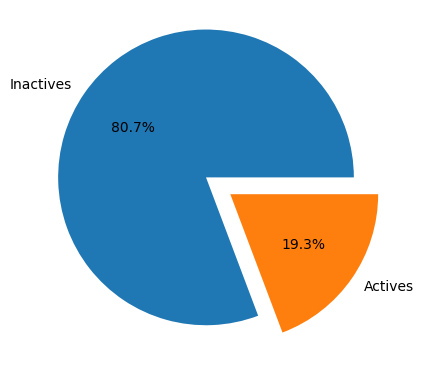

In [ ]:
import matplotlib.pyplot as plt

label = ['Inactives', 'Actives']

sizes = [6, 10]
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels=label, autopct='%.1f%%', explode = (0.2, 0.0))
plt.savefig("/Manuscrip_preparation/data_pie.pdf")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
y_train.value_counts()

Inactive    485
Active      121
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

In [ ]:
y_test.value_counts()

Inactive    215
Active       46
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

PIE PLOT OF TEST DATA

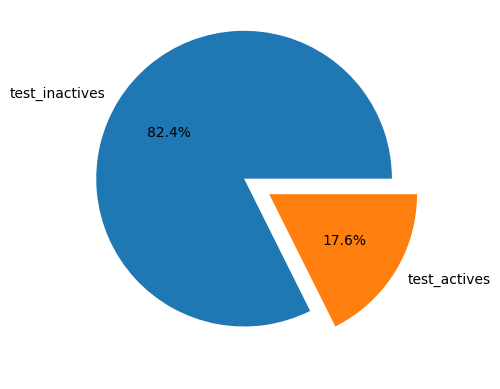

In [ ]:
import matplotlib.pyplot as plt

label = ['test_inactives', 'test_actives']

sizes = [6, 10]
fig, ax = plt.subplots()
ax.pie(y_test.value_counts(), labels=label, autopct='%.1f%%', explode = (0.2, 0.0))
plt.savefig("/Manuscrip_preparation/data_pie.pdf")
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X_train, y_train)

# Append the compound names and targets back to the resampled training data
train_compound_names = compound_names[X_train.index].tolist() + ['Resampled_'+str(i) for i in range(len(X_res)-len(X_train))]
train_targets = y_res.tolist()
X_res = X_res.copy()
X_res.insert(0, 'CID', train_compound_names)


test_compound_names = compound_names[X_test.index].tolist()
X_test.insert(0, 'CID', test_compound_names)

In [ ]:
X_res

,CID,Col_1,Col_41,Col_79,Col_80,Col_81,Col_94,Col_117,Col_119,Col_140,...,Col_1898,Col_1911,Col_1917,Col_1937,Col_1959,Col_1970,Col_2004,Col_2006,Col_2016,Col_2020
0,16190963.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2390959.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1811460.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,49790185.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46942591.0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Resampled_359,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
966,Resampled_360,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
967,Resampled_361,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
968,Resampled_362,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


SVMSMOTE

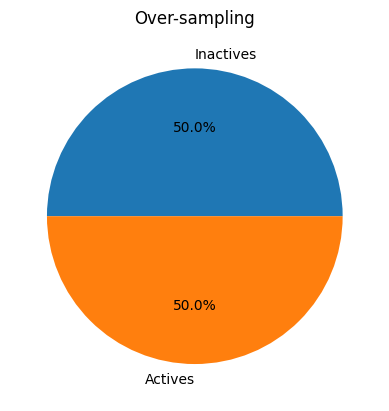

In [ ]:
# After applying smote, synthetic compounds are created for the lower class to equal the higher class


label = ['Inactives', 'Actives']

sizes = [6, 10]
fig, ax = plt.subplots()
ax.pie(y_res.value_counts(), labels=label, autopct='%.1f%%')
plt.title("Over-sampling")
plt.savefig('/Manuscrip_preparation/oversampling.pdf')
plt.show()

In [ ]:
X_res

,CID,Col_1,Col_41,Col_79,Col_80,Col_81,Col_94,Col_117,Col_119,Col_140,...,Col_1898,Col_1911,Col_1917,Col_1937,Col_1959,Col_1970,Col_2004,Col_2006,Col_2016,Col_2020
0,16190963.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2390959.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1811460.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,49790185.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46942591.0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Resampled_359,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
966,Resampled_360,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
967,Resampled_361,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
968,Resampled_362,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [ ]:
y_res.value_counts()  #display balanced data

Inactive    485
Active      485
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

In [ ]:
model = pd.concat( [X_res, y_res], axis=1 )  #merge X-res and y_res as final dependent and indep
model.to_csv('/Manuscrip_preparation/compounds/model.csv', index=False)
model

,CID,Col_1,Col_41,Col_79,Col_80,Col_81,Col_94,Col_117,Col_119,Col_140,...,Col_1911,Col_1917,Col_1937,Col_1959,Col_1970,Col_2004,Col_2006,Col_2016,Col_2020,PUBCHEM_ACTIVITY_OUTCOME
0,16190963.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inactive
1,2390959.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Active
2,1811460.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Inactive
3,49790185.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inactive
4,46942591.0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Resampled_359,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,Active
966,Resampled_360,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,Active
967,Resampled_361,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,Active
968,Resampled_362,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,Active


testing compounds

In [ ]:
testing = pd.concat( [X_test, y_test], axis=1)  #merge X-res and y_res as final dependent and indep
testing.to_csv('/Manuscrip_preparation/compounds/testing.csv', index=False)
testing

,CID,Col_1,Col_41,Col_79,Col_80,Col_81,Col_94,Col_117,Col_119,Col_140,...,Col_1911,Col_1917,Col_1937,Col_1959,Col_1970,Col_2004,Col_2006,Col_2016,Col_2020,PUBCHEM_ACTIVITY_OUTCOME
638,2031935.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Inactive
327,2831273.0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Inactive
169,4876732.0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,Inactive
137,155532030.0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,Active
763,3243606.0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2999495.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,Inactive
749,7384428.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Inactive
462,9549930.0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,Inactive
284,535852.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inactive
